Commencée en 1853, la guerre de Crimée opposa la Russie à une coalition formée de l'Empire ottoman, du Royaume-Uni, de la France et du Royaume de Sardaigne.

Au cours de la guerre, beaucoup de soldats décédaient avant même de parvenir au front, dans les hôpitaux à cause des conditions sanitaires déplorables qui favorisaient le choléra, le typhus et la fièvre typhoide.

In [1]:
# Importons notre fichier puis explorons-le.
import pandas as pd

T = pd.read_csv("/Users/onoff/Documents/DATA ANALYST BI/Training datasets/Nightingale.csv")
T

,Mois,Taille_armée,Maladies,Blessures,Autres
0,Avri.54,8571,1,0,5
1,Mai.54,23333,12,0,9
2,Juin.54,28333,11,0,6
3,Juil.54,28722,359,0,23
4,Août.54,30246,828,1,30
5,Sept.54,30290,788,81,70
6,Oct.54,30643,503,132,128
7,Nov.54,29736,844,287,106
8,Déc.54,32779,1725,114,131
9,Jan.55,32393,2761,83,324


In [11]:
T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Mois          24 non-null     datetime64[ns]
 1   Taille_armée  24 non-null     int64         
 2   Maladies      24 non-null     int64         
 3   Blessures     24 non-null     int64         
 4   Autres        24 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 1.1 KB


In [12]:
T.describe()

,Mois,Taille_armée,Maladies,Blessures,Autres
count,24,24.000000,24.000000,24.000000,24.000000
mean,1855-03-17 07:00:00,34976.291667,603.166667,73.250000,72.833333
min,1854-04-01 00:00:00,8571.000000,1.000000,0.000000,5.000000
25%,1854-09-23 12:00:00,30211.250000,78.750000,0.750000,22.250000
50%,1855-03-16 12:00:00,32586.000000,429.500000,45.000000,32.500000
75%,1855-09-08 12:00:00,43284.000000,808.500000,118.500000,79.000000
max,1856-03-01 00:00:00,47751.000000,2761.000000,287.000000,361.000000
std,NaN,9078.255562,716.798296,86.951886,93.839672


In [13]:
T.value_counts()

Mois        Taille_armée  Maladies  Blessures  Autres
1854-04-01  8571          1         0          5         1
1854-05-01  23333         12        0          9         1
1856-02-01  43485         24        0          19        1
1856-01-01  44212         42        2          48        1
1855-12-01  43217         91        18         28        1
1855-11-01  37853         178       33         32        1
1855-10-01  46852         128       53         18        1
1855-09-01  47751         189       276        20        1
1855-08-01  44614         483       164        25        1
1855-07-01  42647         382       134        33        1
1855-06-01  38863         802       209        31        1
1855-05-01  35473         508       49         37        1
1855-04-01  32252         477       48         57        1
1855-03-01  30107         1205      32         172       1
1855-02-01  30919         2120      42         361       1
1855-01-01  32393         2761      83         324       1
18

Cherchons quels sont les causes de décès pour 1000 soldats dans l'armée.

En avril 1854, il y avait un mort par maladie alors qu'il y a avait 8571 soldats.

En mai 1854, il y avait 12 morts par maladie alors qu'il y avait 23 333 soldats.

Nous souhaitons calculer le nombre de morts par maladie pour 1000 soldats pour chacun de ces deux mois.

In [ ]:
#Créons une nouvelle colonne dans que nous appelerons M_1000

T["M_1000"]=T["Maladies"] / T["Taille_armée"] * 1000 * 12
T.head()

De même créons la colonne B_1000 pour les soldats morts par blessure et A_1000 pour les soldats morts pour d'autres raisons.

In [5]:
T["B_1000"]=T["Blessures"] / T["Taille_armée"] * 1000 * 12 
T["A_1000"]=T["Autres"] / T["Taille_armée"] * 1000 * 12
T.head()

,Mois,Taille_armée,Maladies,Blessures,Autres,B_1000,A_1000
0,1854-04-01,8571,1,0,5,0.000000,7.000350
1,1854-05-01,23333,12,0,9,0.000000,4.628638
2,1854-06-01,28333,11,0,6,0.000000,2.541206
3,1854-07-01,28722,359,0,23,0.000000,9.609359
4,1854-08-01,30246,828,1,30,0.396747,11.902400


Maintenant créons une data visualisation sous forme de rose nous permettant de visualiser la cause des décès pour la période allant de 1854 à 1856.

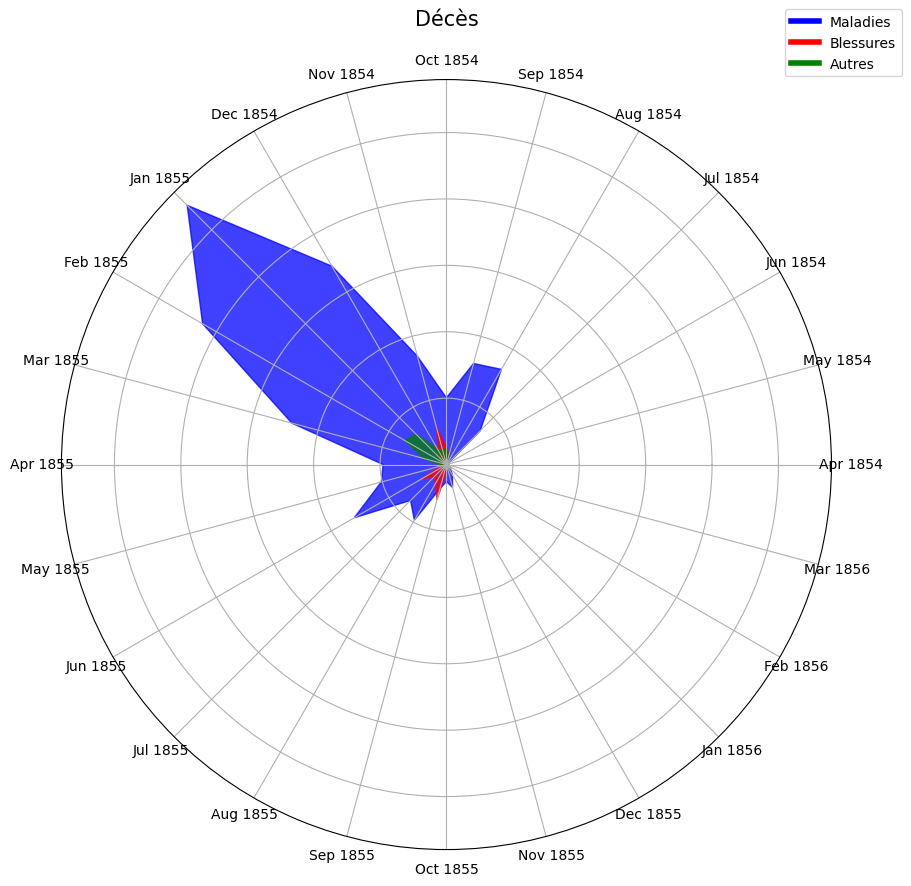

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Chargeons les données
T = pd.read_csv('/Users/onoff/Documents/DATA ANALYST BI/Training datasets/Nightingale.csv')

# Créer un dictionnaire pour remplacer les abréviations des mois français par le format correct pour la conversion
month_mapping = {
    'Avri': 'Apr',
    'Mai': 'May',
    'Juin': 'Jun',
    'Juil': 'Jul',
    'Août': 'Aug',
    'Sept': 'Sep',
    'Oct': 'Oct',
    'Nov': 'Nov',
    'Déc': 'Dec',
    'Janv': 'Jan',
    'Fév': 'Feb',
    'Mars': 'Mar'
}

# Remplaceons les abréviations dans la colonne 'Mois'
for french, english in month_mapping.items():
    T['Mois'] = T['Mois'].str.replace(french, english, regex=False)

# Convertissons la colonne 'Mois' au format datetime
T['Mois'] = pd.to_datetime(T['Mois'], format='%b.%y')

# Corrigeons l'année pour qu'elle soit en 1854-1856
T['Mois'] = T['Mois'].apply(lambda x: x.replace(year=x.year - 200 if x.year > 2000 else x.year))

# Trions les données par mois
T = T.sort_values('Mois')

# Extraction des valeurs pour le diagramme
months = T['Mois'].dt.strftime('%b %Y').unique()
deaths_by_disease = T['Maladies'].values
deaths_by_injury = T['Blessures'].values
deaths_by_other = T['Autres'].values

# Fonction pour créer une rose de Nightingale
def plot_nightingale_rose(ax, values, labels, color):
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]
    
    ax.fill(angles, values, color=color, alpha=0.75)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

# Création du diagramme de Coxcomb
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(polar=True))

# Créer les roses pour chaque cause de décès
plot_nightingale_rose(ax, deaths_by_disease, months, 'blue')
plot_nightingale_rose(ax, deaths_by_injury, months, 'red')
plot_nightingale_rose(ax, deaths_by_other, months, 'green')

# Ajout d'un titre global
ax.set_title('Décès', size=15, pad=20)

# Ajout d'une légende
legend_labels = ['Maladies', 'Blessures', 'Autres']
legend_colors = ['blue', 'red', 'green']
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]
ax.legend(handles, legend_labels, loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


A présent je souhaite sélectionner uniquement les 12 premiers mois de notre dataset afin de déterminer les causes de décès pour cette période.

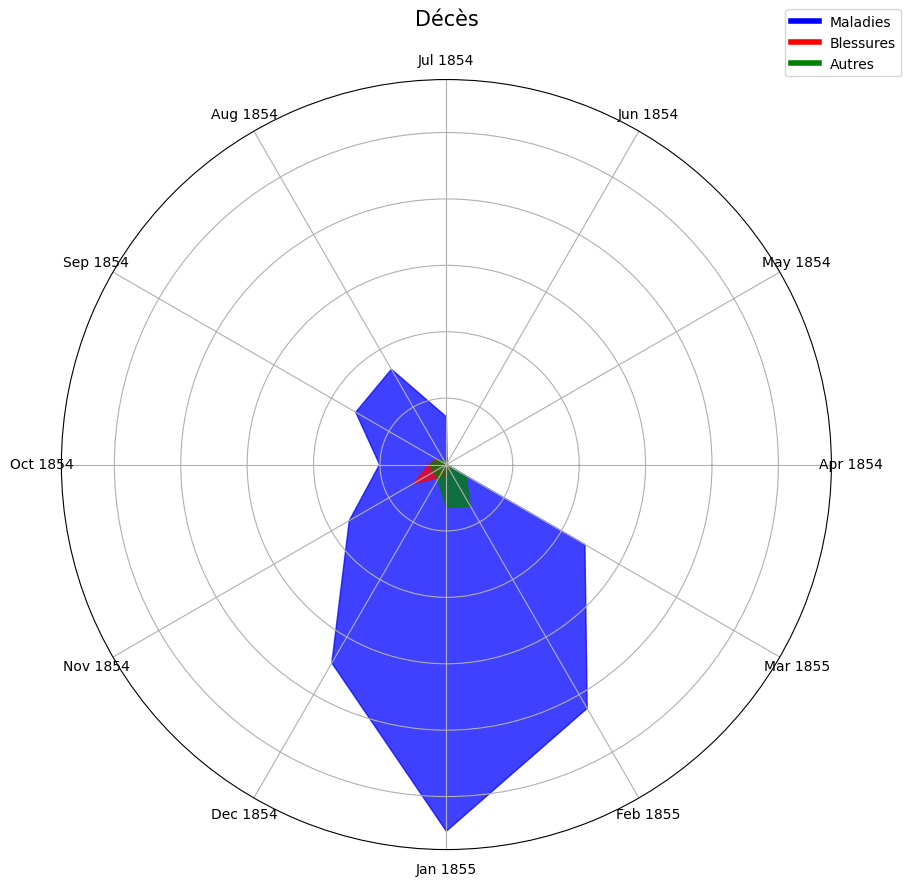

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Chargeons les données
T = pd.read_csv('/Users/onoff/Documents/DATA ANALYST BI/Training datasets/Nightingale.csv')

# Créer un dictionnaire pour remplacer les abréviations des mois français par le format correct pour la conversion
month_mapping = {
    'Avri': 'Apr',
    'Mai': 'May',
    'Juin': 'Jun',
    'Juil': 'Jul',
    'Août': 'Aug',
    'Sept': 'Sep',
    'Oct': 'Oct',
    'Nov': 'Nov',
    'Déc': 'Dec',
    'Janv': 'Jan',
    'Fév': 'Feb',
    'Mars': 'Mar'
}

# Remplaceons les abréviations dans la colonne 'Mois'
for french, english in month_mapping.items():
    T['Mois'] = T['Mois'].str.replace(french, english, regex=False)

# Convertissons la colonne 'Mois' au format datetime
T['Mois'] = pd.to_datetime(T['Mois'], format='%b.%y')

# Corrigeons l'année pour qu'elle soit en 1854-1856
T['Mois'] = T['Mois'].apply(lambda x: x.replace(year=x.year - 200 if x.year > 2000 else x.year))

# Trions les données par mois
T = T.sort_values('Mois')

# Sélectionnons uniquement les 12 premiers mois
T_12 = T.head(12)

# Extraction des valeurs pour le diagramme
months = T_12['Mois'].dt.strftime('%b %Y').unique()
deaths_by_disease = T_12['Maladies'].values
deaths_by_injury = T_12['Blessures'].values
deaths_by_other = T_12['Autres'].values

# Fonction pour créer une rose de Nightingale
def plot_nightingale_rose(ax, values, labels, color):
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]
    
    ax.fill(angles, values, color=color, alpha=0.75)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

# Création du diagramme de Coxcomb
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(polar=True))

# Créons les roses pour chaque cause de décès
plot_nightingale_rose(ax, deaths_by_disease, months, 'blue')
plot_nightingale_rose(ax, deaths_by_injury, months, 'red')
plot_nightingale_rose(ax, deaths_by_other, months, 'green')

# Ajout d'un titre global
ax.set_title('Décès', size=15, pad=20)

# Ajout d'une légende
legend_labels = ['Maladies', 'Blessures', 'Autres']
legend_colors = ['blue', 'red', 'green']
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]
ax.legend(handles, legend_labels, loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()
